Dataset Head:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2  Female   21                  16                      81
2           3  Female   20                  17                       6
3           4    Male   23                  18                      77
4           5  Female   31                  19                      40


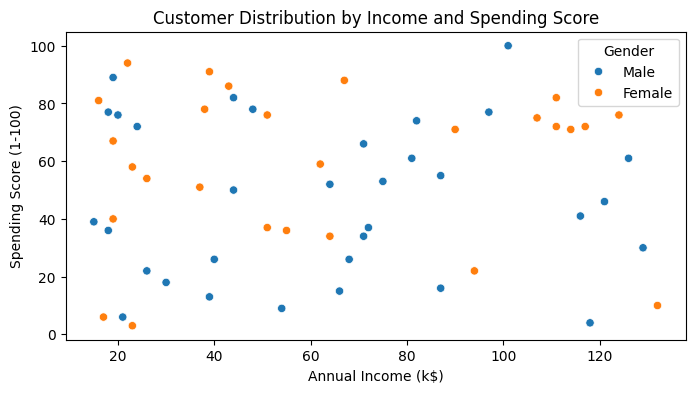

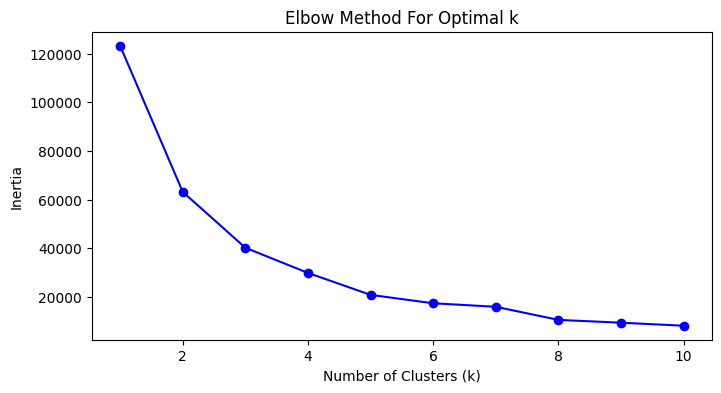

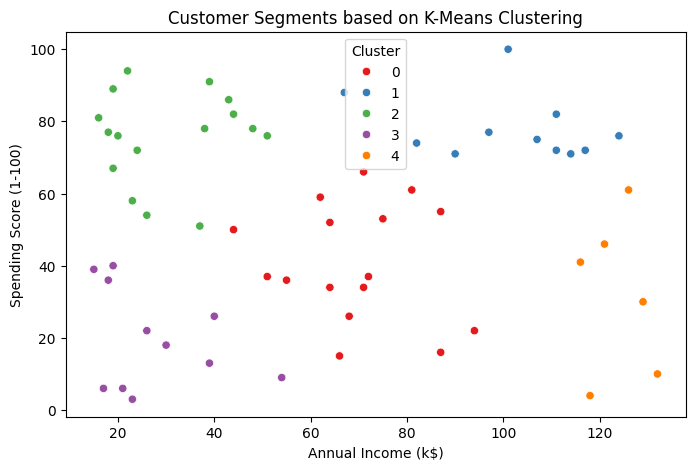

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv("/content/Mall_Customers_Updated.csv")

# Display basic info
print("Dataset Head:")
print(df.head())

# Rename columns for ease (if needed)
df.columns = ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Visualize the data distribution
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Gender')
plt.title("Customer Distribution by Income and Spending Score")
plt.show()

# Extract relevant features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Use the Elbow Method to find optimal number of clusters
inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, 'bo-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method For Optimal k")
plt.show()

# Apply K-Means with optimal clusters (let’s say 5 based on elbow curve)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1')
plt.title("Customer Segments based on K-Means Clustering")
plt.show()